# Deep Learning: Overfitting, Metriche e Curve di Performance
**Professore:** Gemini AI

In questo laboratorio finale analizzeremo:
1. **Il fenomeno dell'Overfitting:** Quando il modello impara a memoria i dati di training ma fallisce sui nuovi dati.
2. **Metriche di Valutazione:** Oltre l'accuratezza, esploreremo Matrice di Confusione, ROC-AUC e Precision-Recall.

### 1. Preparazione Dati e Librerie
Creeremo un problema di classificazione binaria non lineare (a forma di cerchi concentrici).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras import layers, models

# Generazione dati (cerchi concentrici)
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dati generati e suddivisi.")

Dati generati e suddivisi.


c:\Users\mbagn\anaconda3\envs\pytorch\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### 2. Creazione dei due Modelli
- **Modello Normale:** Una rete semplice ed equilibrata.
- **Modello Overfitting:** Una rete eccessivamente complessa (troppi neuroni) addestrata su un set di dati ridotto per forzare l'errore.

In [2]:
def build_model(complexity='normal'):
    model = models.Sequential()
    if complexity == 'normal':
        model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
        model.add(layers.Dense(8, activation='relu'))
    else:
        # Modello enorme per causare overfitting
        model.add(layers.Dense(512, activation='relu', input_shape=(2,)))
        model.add(layers.Dense(512, activation='relu'))
        model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_normal = build_model('normal')
model_overfit = build_model('overfit')

# Allenamento
print("Allenamento Modello Normale...")
history_normal = model_normal.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

print("Allenamento Modello Overfitting (con dati ridotti)...")
# Usiamo solo 50 esempi per forzare l'overfitting
history_overfit = model_overfit.fit(X_train[:50], y_train[:50], epochs=200, validation_data=(X_test, y_test), verbose=0)

c:\Users\mbagn\anaconda3\envs\pytorch\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Allenamento Modello Normale...
Allenamento Modello Overfitting (con dati ridotti)...


### 3. Confronto Loss e Accuracy
Nell'**Overfitting**, vedrai la curva di training scendere a zero, mentre la curva di validazione (test) inizierà a risalire: il modello sta smettendo di imparare concetti e sta iniziando a memorizzare il rumore.

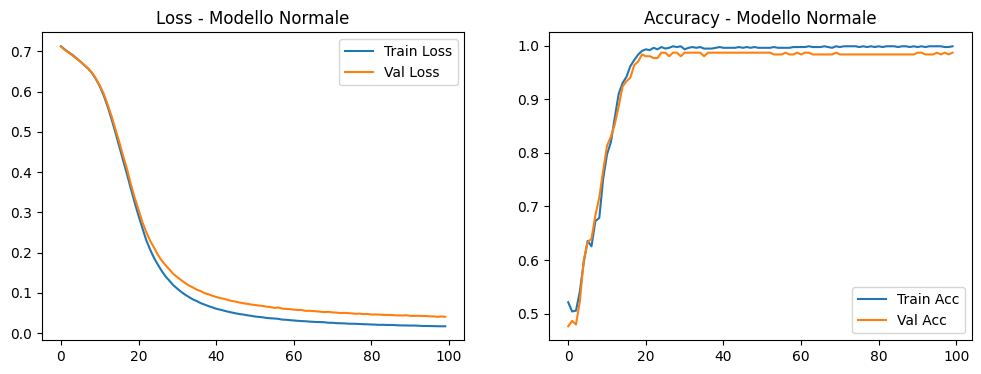

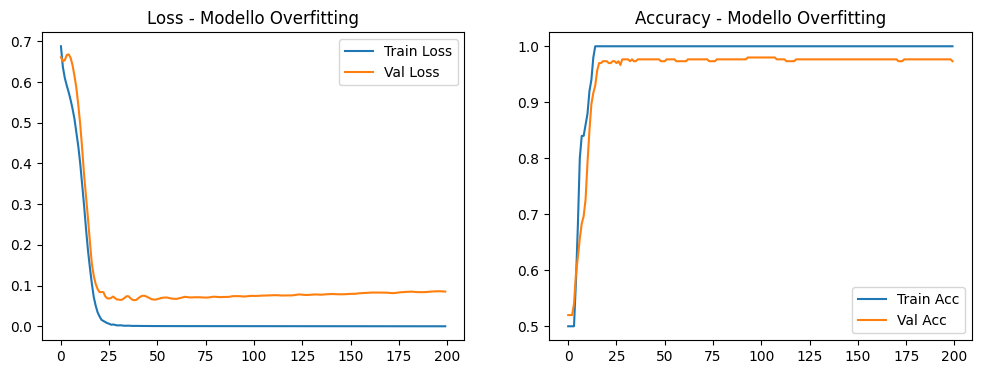

In [3]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - {title}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Accuracy - {title}')
    plt.legend()
    plt.show()

plot_history(history_normal, "Modello Normale")
plot_history(history_overfit, "Modello Overfitting")

### 4. Matrice di Confusione (Modello Normale)
La matrice mostra dove il modello si confonde tra classi positive e negative.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


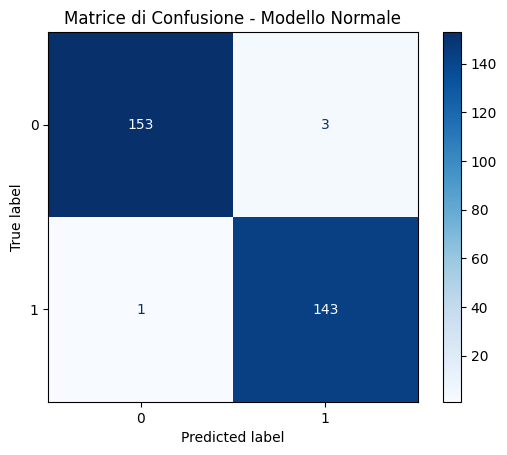

In [4]:
y_pred_prob = model_normal.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice di Confusione - Modello Normale")
plt.show()

### 5. Curve ROC e Precision-Recall
- **ROC:** Analizza il trade-off tra Veri Positivi e Falsi Positivi.
- **Precision-Recall:** Molto utile quando le classi sono sbilanciate.

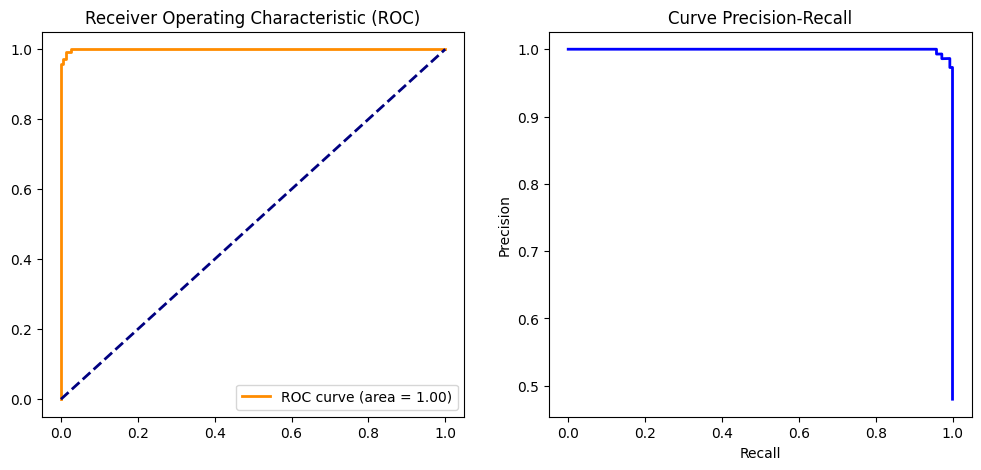

In [5]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Curve Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()